<a href="https://colab.research.google.com/github/JoseManuel312/Estadisticas-/blob/main/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadísticas descriptivas básicas:
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Medidas de tendencia central:
Mínimo: 5118.0
Máximo: 45400.0
Moda: 5572.0
Media: 13207.129353233831
Mediana: 10295.0
Desviación estándar: 7947.066341939271


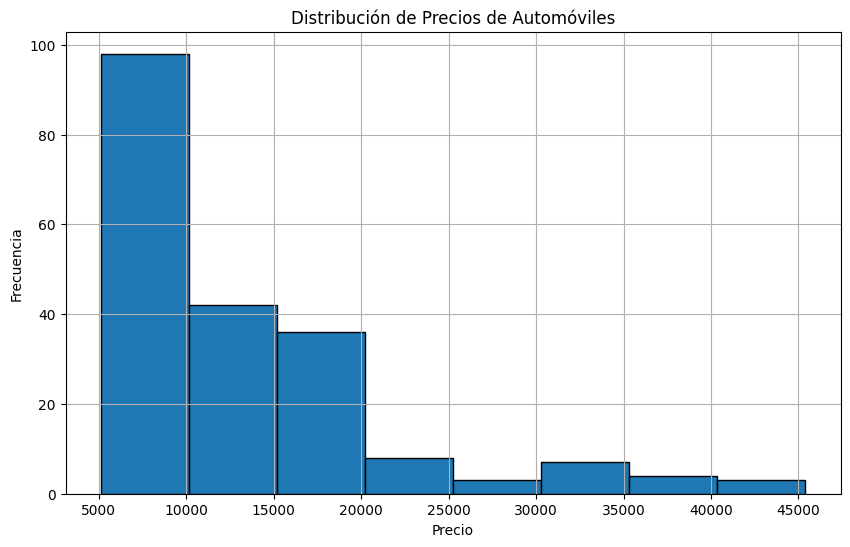

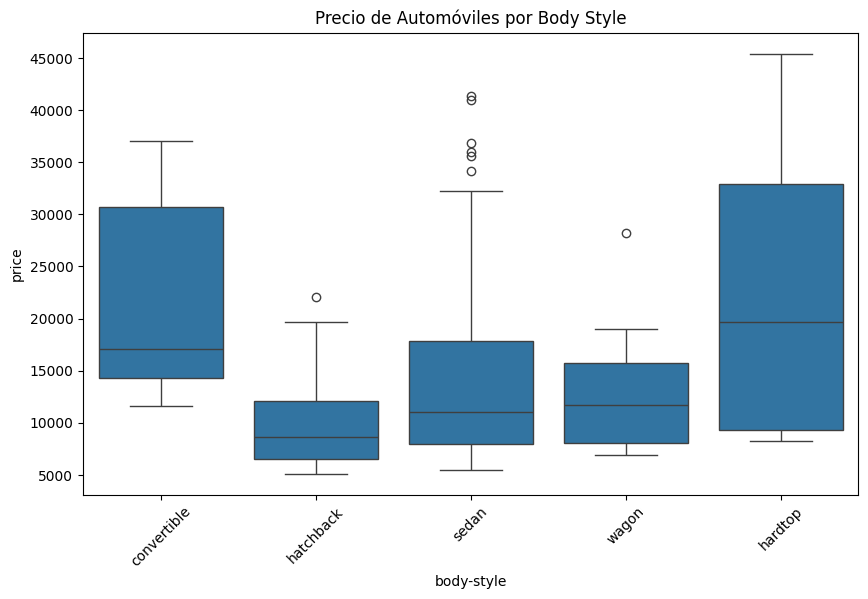

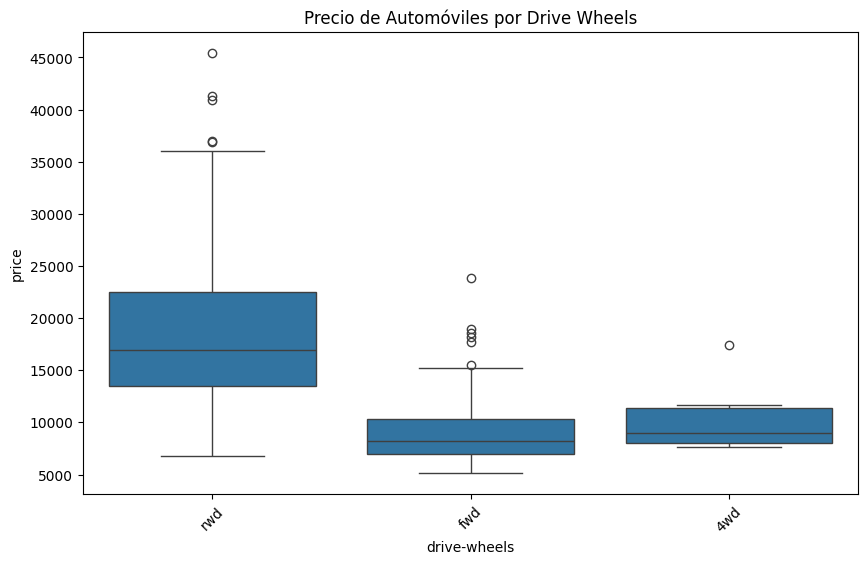

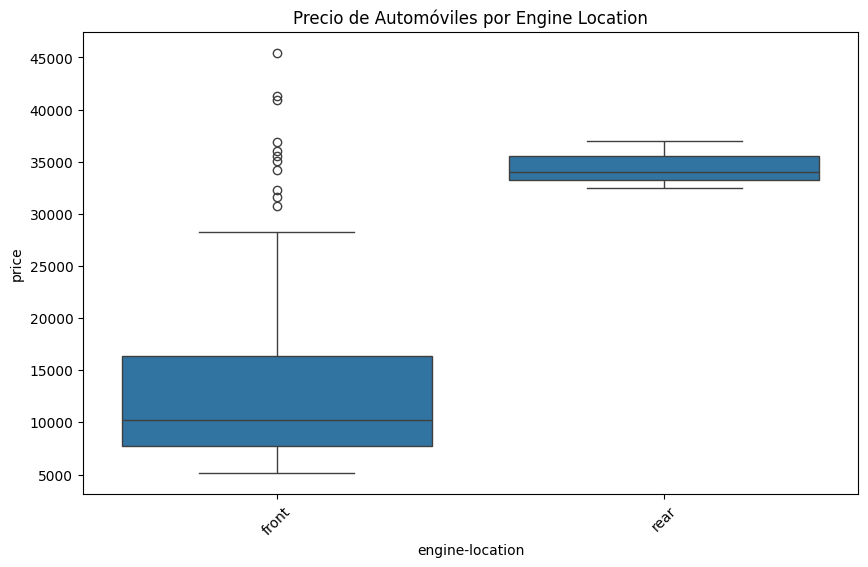

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Verificar si el archivo existe
file_path = "/content/autos2.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo {file_path} no se encuentra.")

# Cargar el dataset
df = pd.read_csv(file_path)

# Convertir la columna 'price' a numérica, manejando valores no numéricos
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar si la columna 'price' tiene datos válidos
if df['price'].dropna().empty:
    raise ValueError("No hay datos válidos en la columna 'price'.")

# Estadísticas descriptivas
print("Estadísticas descriptivas básicas:")
print(df['price'].describe())

# Medidas de tendencia central
print("\nMedidas de tendencia central:")
print(f"Mínimo: {df['price'].min()}")
print(f"Máximo: {df['price'].max()}")
print(f"Moda: {df['price'].mode().iloc[0] if not df['price'].mode().empty else 'N/A'}")
print(f"Media: {df['price'].mean()}")
print(f"Mediana: {df['price'].median()}")
print(f"Desviación estándar: {df['price'].std()}")

# Histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=int(1 + 3.322 * np.log10(len(df['price'].dropna()))), edgecolor='black')
plt.title('Distribución de Precios de Automóviles')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Verificar si las columnas categóricas existen antes de graficar
categorical_columns = ['body-style', 'drive-wheels', 'engine-location']
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=df[col], y=df['price'])
        plt.title(f'Precio de Automóviles por {col.replace("-", " ").title()}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Advertencia: La columna '{col}' no se encuentra en el dataset.")
